<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/EVA4P2_S2_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Dependencies


In [2]:
%run '/content/drive/My Drive/EVA4/default_setup.py'

Installing mandatory requirements
Installing albumentations
System imports completed


  pip install torch-lr-finder -v --global-option="amp"
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dev imports completed


In [3]:
!cp /content/drive/My\ Drive/EVA4/Flying\ Birds.zip /content/FlyingBirds.zip
!cp /content/drive/My\ Drive/EVA4/Large\ QuadCopters-20200723T085054Z-001.zip /content/LargeQuadCopters.zip
!cp /content/drive/My\ Drive/EVA4/Small\ QuadCopters.zip /content/SmallQuadCopters.zip
!cp /content/drive/My\ Drive/EVA4/Winged\ Drones-20200723T075457Z-001.zip /content/WingedDrones.zip

!ls -1 /content/*zip |while read line; do unzip -q $line;done

In [5]:
class_names = ['Flying Birds', 'Large QuadCopters', 'Small QuadCopters', 'Winged Drones']
file_list = []
for class_indf in class_names:
    file_list.extend(glob.glob(os.path.join('/content/',class_indf,'*.*'), recursive=True))
print("Total files available:{}".format(len(file_list)))

Total files available:21805


In [6]:
df_birds = pd.DataFrame(columns=['FileName', 'DirName', 'Extn', 'Size', 'ClassName'])
for file_name in file_list:
    base_name, dir_name = os.path.basename(file_name), os.path.dirname(file_name) 
    extn = base_name.split(".")[-1]
    classname = os.path.basename(dir_name)
    row_val = {'FileName':base_name, 'DirName':dir_name, 'Extn':extn, 'Size': int(os.path.getsize(file_name)/1024), 'ClassName':classname }
    df_birds = df_birds.append(row_val,ignore_index=True)
    #print("FileName: {} Size: {}KB".format(file_name, int(os.path.getsize(file_name)/1024)))
    


In [ ]:
df_birds

,FileName,DirName,Extn,Size,ClassName
0,14958138204_50a415d9e0_n.jpg,/content/Flying Birds,jpg,17.0,Flying Birds
1,birds-flying-shape-v-cloudy-sunset-sky-view-sh...,/content/Flying Birds,jpg,8.0,Flying Birds
2,d14a2f8d3a04b5fc635226d2f65a344b--tattoo-swall...,/content/Flying Birds,jpg,6.0,Flying Birds
3,39277305194_f7cf71c748_n.jpg,/content/Flying Birds,jpg,23.0,Flying Birds
4,WRmtrPMgYSyBXSub5WmGfAHaEK.jpg,/content/Flying Birds,jpg,13.0,Flying Birds
...,...,...,...,...,...
21800,imagessss (29).jpg,/content/Winged Drones,jpg,7.0,Winged Drones
21801,uav2-1024x551-1.jpg,/content/Winged Drones,jpg,75.0,Winged Drones
21802,images588.jpg,/content/Winged Drones,jpg,1.0,Winged Drones
21803,Image_306.jpg,/content/Winged Drones,jpg,48.0,Winged Drones


In [7]:
def lowercase_simplify_filenames(file_name):
    local_file_name = file_name.lower()
    if re.match('jpeg',local_file_name):
        local_file_name='jpg'
    return local_file_name

In [8]:
df_birds.loc[:,'Extn'] = df_birds.loc[:,'Extn'].apply(lowercase_simplify_filenames)

In [9]:
df_birds['Size'] = df_birds['Size'].astype('float32')

In [10]:
df_birds.loc[:,'Extn'].unique()

array(['jpg', 'png', 'webp', 'jfif', 'txt', 'gif', 'ppm', 'ipynb', 'svg'],
      dtype=object)

In [ ]:
df_birds.groupby(by='Extn').count()['FileName']

Extn
gif         13
ipynb        1
jfif         2
jpg      21513
png        261
ppm          3
svg          1
txt          3
webp         8
Name: FileName, dtype: int64

Text(0.5, 1.0, 'Extensions-wise Filecount in Log')

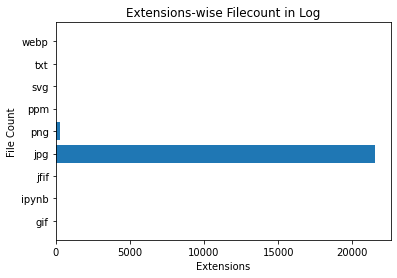

In [ ]:
plt.barh(df_birds.groupby(by='Extn')['FileName'].count().index.values, df_birds.groupby(by='Extn')['FileName'].count().values)
plt.xlabel("Extensions")
plt.ylabel("File Count")
plt.title("Extensions-wise Filecount in Log" )

### Basic cleaning
1. Removing files with size = 0
2. Ignoring non-JPG images as they are less 1%
 

In [11]:
df_birds = df_birds.loc[(df_birds['Size'] != 0) & (df_birds['Extn'] == 'jpg'),:] 

In [12]:
df_birds.count()

FileName     21512
DirName      21512
Extn         21512
Size         21512
ClassName    21512
dtype: int64

### Classwise Distribution

Text(0.5, 1.0, 'Classwise Filecount')

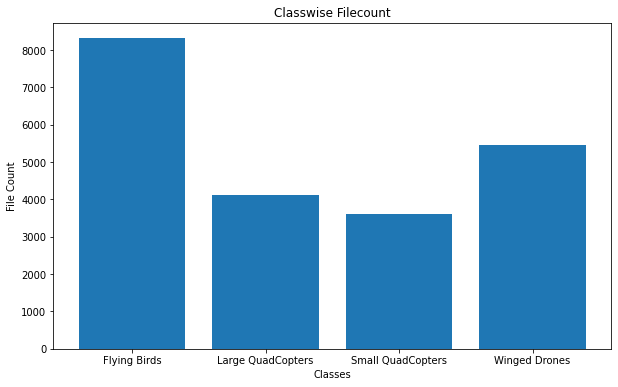

In [13]:
df_birds_grp = df_birds.groupby(by='ClassName')
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,6))
plt.bar(df_birds_grp['FileName'].count().index.values, df_birds_grp['FileName'].count().values)
plt.xlabel("Classes")
plt.ylabel("File Count")
plt.title("Classwise Filecount")

In [14]:
df_birds_grp.count()

,FileName,DirName,Extn,Size
ClassName,,,,
Flying Birds,8317,8317,8317,8317
Large QuadCopters,4126,4126,4126,4126
Small QuadCopters,3613,3613,3613,3613
Winged Drones,5456,5456,5456,5456


In [15]:
jpg_extn='jpg'
df_birds.query('Extn == @jpg_extn and Size < 1000').count()                                                       

FileName     20789
DirName      20789
Extn         20789
Size         20789
ClassName    20789
dtype: int64

In [16]:
jpg_extn = 'jpg'
df_birds.query('Extn == @jpg_extn and Size < 10000').count()

FileName     21442
DirName      21442
Extn         21442
Size         21442
ClassName    21442
dtype: int64

### Classwise File Size distribution

Text(0.5, 1.0, 'ClassName vs FileSize')

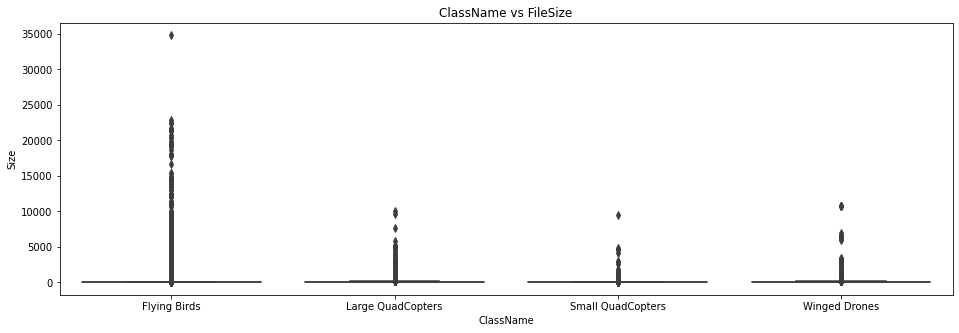

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,5))
QuadCopters = "Large QuadCopters"

#ax = sns.boxplot(x="ClassName", y="Size", data=df_birds.iloc[1000:1100].query('ClassName == @QuadCopters'))
ax = sns.boxplot(x="ClassName", y="Size", data=df_birds)

ax.set_title('ClassName vs FileSize')

### Filesize based K-Means

In [114]:
df_birds.loc[:, ['Size']].describe()

,Size
count,21512.000000
mean,201.252609
std,1166.905884
min,1.000000
25%,6.000000
50%,15.000000
75%,45.250000
max,34793.000000


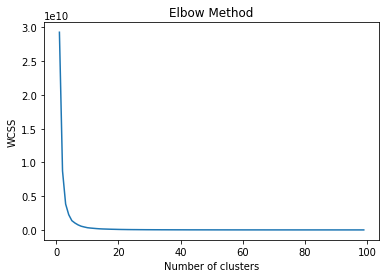

In [109]:
cluster_X = df_birds.loc[:, ['Size']].values
wcss = []
max_clusters = 100
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(cluster_X)

In [112]:
fig = go.Figure()
x_values = df_birds.index.values

# Add traces
fig.add_trace(go.Scatter(x=x_values, y=cluster_X[:,0],
                    mode='markers',
                    name='Actual Data'))
fig.add_trace(go.Scatter(x=[offset for offset in range(4)], y=kmeans.cluster_centers_[:, 0],
                    mode='markers',
                    marker=dict(size=16),
                    name='Cluster Centers',))
fig.update_layout(height=768, width=1024,title_text="FileSize for all classes")

fig.show()

In [111]:
kmeans.cluster_centers_[:,0]

array([   48.076324,  5567.293   , 20800.385   ,  1949.8273  ,
       10988.436   ], dtype=float32)

In [113]:
print(pd.DataFrame(pred_y).iloc[:,0].value_counts())


0    20789
3      425
1      189
4       83
2       26
Name: 0, dtype: int64


### Dataset Pruning


Based on above analysis, dataset could be slightly pruned to include images with sizes < 10KB to get a good representation of overall sample




### Add Height and Width attributes

In [ ]:
def identify_image_resolution(img_file_name):#, base_name):
    img_file = os.path.join(img_file_name['DirName'], img_file_name['FileName'])
    img_type='square'
    with Image.open(img_file) as img_file:
        width, height = img_file.size
    if width != height:
        img_type='rectangle'
    return width,height, img_type

In [ ]:
df_birds['Width'] = df_birds['Height'] = df_birds['Orientation'] = ""
df_birds[['Width', 'Height', 'Orientation']] = df_birds.loc[:,['FileName','DirName']].apply(identify_image_resolution,axis=1).tolist()

In [ ]:
df_birds[(df_birds['Width'] > 224) & (df_birds['Height'] > 224)]

#### Height vs Width Visualizations

Dataset largely consists of Rectangular orientated images. This is a challenge because our model expects **square** (i.e h=w) images

In [ ]:
df_birds.groupby(by='Orientation').count()

,FileName,DirName,Extn,Size,ClassName,Width,Height
Orientation,,,,,,,
rectangle,18571,18571,18571,18571,18571,18571,18571
square,2941,2941,2941,2941,2941,2941,2941


Text(0.5, 1.0, 'Orientation')

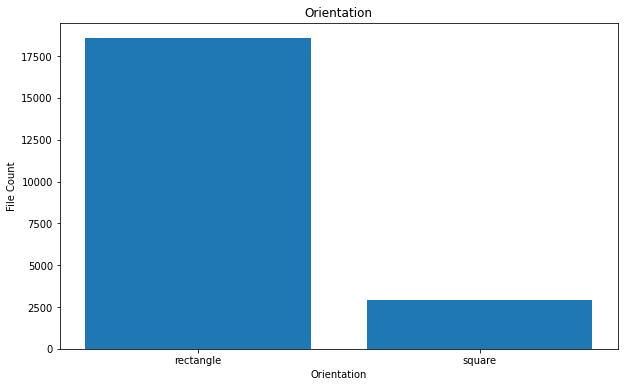

In [ ]:
df_birds_grp = df_birds.groupby(by='Orientation')
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,6))
plt.bar(df_birds_grp['FileName'].count().index.values, df_birds_grp['FileName'].count().values)
plt.xlabel("Orientation")
plt.ylabel("File Count")
plt.title("Orientation")

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=4, subplot_titles=tuple(class_names))

row=col=1
for class_str in class_names:
    df_plot = df_birds[df_birds['ClassName'] == class_str]
    fig.add_trace(
        go.Scatter(x=df_plot['Height'], y=df_plot['Width'],mode='markers',name=class_str),        
        row=row, col=col
    )
    col = col+1
fig.update_layout(height=600, width=800, title_text="Height vs Width for each image class")
fig.show()

#### K-Means for [Height, Width]

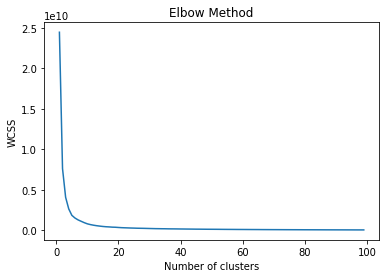

In [132]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

cluster_X = df_birds.loc[:, ['Height', 'Width']].values

wcss = []
max_clusters = 100
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [133]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(cluster_X)

In [134]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=cluster_X[:,0], y=cluster_X[:,1],
                    mode='markers',
                    name='Raw Data'))
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                    mode='markers',
                    marker=dict(size=16),
                    name='Cluster Centers',))
fig.update_layout(height=768, width=1024,title_text="Height vs Width for "+class_names[0])

fig.show()

#### Clusters and Clusterwise counts

In [135]:
print(kmeans.cluster_centers_)


[[ 246.52879581  343.95641715]
 [2578.96023857 3405.84890656]
 [1234.68545455 1882.85909091]
 [ 640.30549936  921.3500092 ]
 [3836.14201183 5498.92899408]]


In [139]:
pd.DataFrame(pred_y,columns=['Clusters']).groupby(by='Clusters').agg({'Clusters':'count'}).values

array([[14130],
       [  503],
       [ 1104],
       [ 5437],
       [  338]])

### Final DataSet
1. Files with .JPG extension and size < 10KB were chosen
2. For training, image size was chosen as follows based on K-Means:
    a. Resize images to 512x512
    b. RandomResizedCrop to 224x224
3. For testing, images were directly resized to 224x224

    